Prep

In [ ]:
!wget https://nlp100.github.io/data/neko.txt
!apt install mecab libmecab-dev mecab-ipadic-utf8

In [ ]:
!mecab -o ./neko.txt.mecab ./neko.txt

In [ ]:
import matplotlib.pyplot as plt

30

In [ ]:
filename = './neko.txt.mecab'

sentences = []
morphs = []

with open(filename, mode='r+t') as f:
  for line in f:
    if line != 'EOS\n':
      div = line.split('\t')
      if len(div) != 2 or div[0] =='':
        continue
      attr = div[1].split(',')
      if attr[1]=='空白':
        continue
      morph = {'surface':div[0], 'base':attr[6], 'pos':attr[0], 'pos1':attr[1]}
      morphs.append(morph)
    else:
      sentences.append(morphs)
      morphs = []

sentences[2]

[{'base': '吾輩', 'pos': '名詞', 'pos1': '代名詞', 'surface': '吾輩'},
 {'base': 'は', 'pos': '助詞', 'pos1': '係助詞', 'surface': 'は'},
 {'base': '猫', 'pos': '名詞', 'pos1': '一般', 'surface': '猫'},
 {'base': 'だ', 'pos': '助動詞', 'pos1': '*', 'surface': 'で'},
 {'base': 'ある', 'pos': '助動詞', 'pos1': '*', 'surface': 'ある'},
 {'base': '。', 'pos': '記号', 'pos1': '句点', 'surface': '。'}]

31

In [ ]:
verb_surf = set()
for sentence in sentences:
  for m in sentence:
      if m['pos'] == '動詞':
        verb_surf.add(m['surface'])

verb_surf

32

In [ ]:
verb_base = set()
for sentence in sentences:
  for m in sentence:
      if m['pos'] == '動詞':
        verb_base.add(m['base'])

verb_base

33

In [ ]:
no = set()
for sentence in sentences:
  for i in range(1,len(sentence)-1):
    if sentence[i-1]['pos']=='名詞' and sentence[i]['surface']=='の' and sentence[i+1]['pos']=='名詞':
      no.add(sentence[i-1]['surface'] + sentence[i]['surface'] + sentence[i+1]['surface'])

for n in list(no)[:10]:
  print(n)

滑りの難所
国民の歓喜
博士の学位
顱の頭
猫の企て
君子の敵
君の懐
館の君子
上級生の命令
二の方法


34

In [ ]:
cont_noun = set()
count=0

for sentence in sentences:
  tmp = list()
  for char in sentence:
    if char['pos']=='名詞':
      tmp.append(char['surface'])
      count+=1
    else:
      if count>1:
        p= ''.join(tmp)
        cont_noun.add(p)
      tmp = list()
      count=0

cont_noun

35

In [ ]:
occur = dict()
for sentence in sentences:
  for m in sentence:
    if m['pos']!='記号':
      if m['base'] not in occur:
        occur[m['base']] = 1
      else:
        occur[m['base']] += 1

occur = sorted(occur.items(), key=lambda item: item[1], reverse=True)
occur

36

In [ ]:
!pip install japanize_matplotlib

In [ ]:
import japanize_matplotlib

['の', 'て', 'は', 'に', 'を', 'だ', 'と', 'が', 'た', 'する']


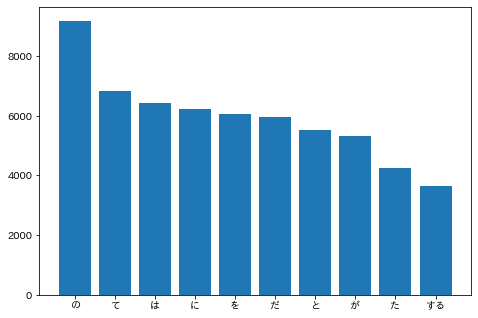

In [ ]:
top10 = occur[:10]
words = [top10[i][0] for i in range(len(top10))]
val = [top10[i][1] for i in range(len(top10))]
print(words)

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(words, val)
plt.show()

37

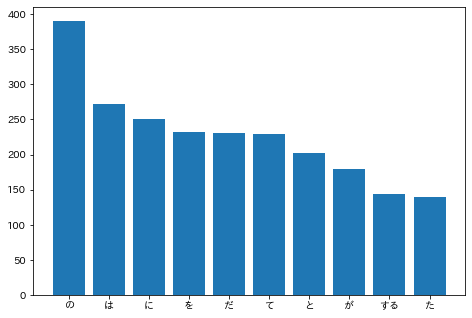

In [ ]:
cooccur = dict()

for sentence in sentences:
  tmp=list()
  for word in sentence:
    if word['pos']!='記号':
      tmp.append(word['base'])
  if '猫' in tmp:
    for w in tmp:
      if w!='猫':
        if w not in cooccur:
          cooccur[w]=1
        else:
          cooccur[w]+=1

sorted_coocur = sorted(cooccur.items(), key=lambda item: item[1], reverse=True)
top10 = sorted_coocur[:10]

words = [top10[i][0] for i in range(len(top10))]
val = [top10[i][1] for i in range(len(top10))] 

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(words, val)
plt.show()

38

dict_keys([9194, 6848, 6420, 6243, 6071, 5972, 5508, 5337, 4267, 3657, 3052, 2479, 2320, 2191, 2084, 2031, 1777, 1568, 1529, 1408, 1207, 1164, 1146, 1120, 1034, 987, 981, 973, 932, 719, 696, 675, 657, 649, 636, 617, 602, 576, 554, 546, 539, 502, 481, 460, 450, 414, 410, 381, 347, 346, 345, 340, 324, 319, 317, 313, 312, 311, 303, 294, 286, 282, 274, 272, 269, 268, 261, 260, 250, 248, 246, 241, 238, 236, 234, 231, 227, 220, 217, 216, 213, 208, 206, 205, 199, 195, 194, 193, 189, 185, 179, 176, 175, 173, 172, 169, 168, 166, 159, 158, 154, 152, 151, 150, 149, 148, 147, 143, 142, 140, 134, 133, 132, 131, 129, 127, 126, 125, 121, 120, 119, 118, 116, 115, 114, 113, 112, 111, 110, 108, 107, 106, 105, 104, 103, 102, 101, 100, 99, 98, 97, 96, 95, 94, 93, 91, 90, 89, 88, 86, 85, 84, 83, 82, 81, 80, 79, 78, 77, 76, 75, 74, 73, 72, 71, 70, 69, 68, 67, 66, 65, 64, 63, 62, 61, 60, 59, 58, 57, 56, 55, 54, 53, 52, 51, 50, 49, 48, 47, 46, 45, 44, 43, 42, 41, 40, 39, 38, 37, 36, 35, 34, 33, 32, 31, 30, 29

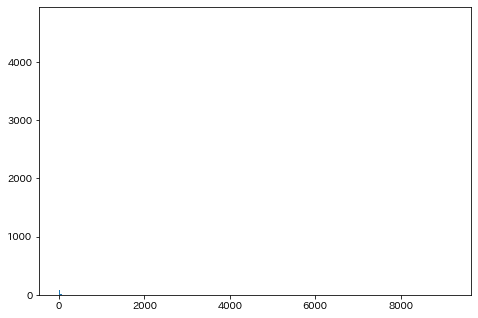

In [ ]:
occur #list containing ('word', occurence)

histogram = dict()
for el in occur:
  if el[1] not in histogram:
    histogram[el[1]]=1
  else:
    histogram[el[1]]+=1

occurence = histogram.keys()
types = histogram.values()
print(occurence)
print(types)

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(occurence, types)

plt.show()

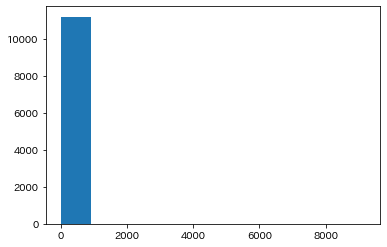

In [ ]:
histogram = dict(occur).values()

fig = plt.figure()
plt.hist(histogram)
plt.show()

39

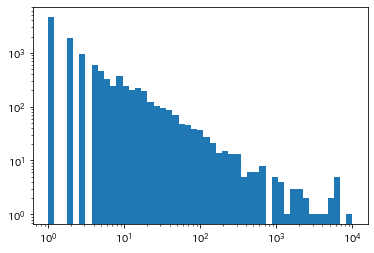

In [ ]:
import numpy as np

fig = plt.figure()
plt.hist(histogram, bins=np.logspace(0,4))
plt.yscale('log')
plt.xscale('log')
plt.show()

In [ ]:
histogram

dict_values([9194, 6848, 6420, 6243, 6071, 5972, 5508, 5337, 4267, 3657, 3052, 2479, 2320, 2191, 2084, 2031, 1777, 1568, 1529, 1408, 1207, 1164, 1146, 1120, 1034, 987, 981, 973, 932, 719, 696, 675, 657, 649, 636, 617, 602, 576, 554, 546, 539, 502, 502, 481, 460, 450, 450, 414, 410, 381, 347, 346, 345, 340, 324, 319, 317, 317, 313, 313, 312, 311, 303, 294, 294, 286, 282, 274, 272, 269, 268, 261, 260, 250, 248, 246, 241, 238, 236, 234, 231, 231, 227, 220, 217, 216, 213, 208, 206, 205, 199, 195, 195, 194, 194, 193, 189, 185, 179, 176, 175, 175, 173, 172, 169, 169, 168, 166, 166, 159, 158, 154, 154, 152, 152, 151, 150, 150, 149, 149, 149, 148, 147, 143, 143, 142, 140, 134, 134, 133, 132, 131, 131, 129, 127, 126, 125, 125, 125, 121, 120, 119, 119, 119, 118, 118, 116, 116, 115, 115, 114, 113, 113, 112, 111, 111, 110, 108, 108, 108, 108, 107, 107, 107, 107, 106, 106, 105, 104, 104, 103, 102, 102, 102, 101, 101, 101, 100, 99, 99, 98, 98, 97, 97, 97, 96, 96, 96, 95, 94, 94, 93, 93, 93, 91, 91, 

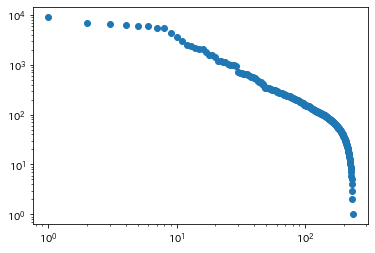

In [ ]:
'''これが正解？'''
histogram = list(set(histogram))
histogram = sorted(histogram, reverse=True)

x = [i for i in range(1,len(histogram)+1)]
y = histogram
fig = plt.figure
plt.scatter(x,y)
plt.yscale('log')
plt.xscale('log')
plt.show()

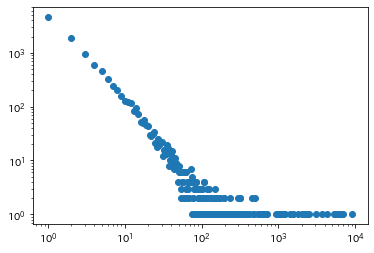

In [ ]:
#これは違う。。。
histogram = dict()
for el in occur:
  if el[1] not in histogram:
    histogram[el[1]]=1
  else:
    histogram[el[1]]+=1

occurence = histogram.keys()
types = histogram.values()

x = occurence
y = types

fig = plt.figure
plt.scatter(x,y)
plt.yscale('log')
plt.xscale('log')
plt.show()